# 🎓 Student Performance Prediction Framework
## Complete Machine Learning Analysis for Educational Equity

**Research Paper**: *A Machine Learning Framework for Understanding the Link between Parental Education, Socioeconomic Status, and Student Performance*

**Conference**: AISC 2025, Kolkata | **Sponsor**: IEEE Kolkata Section | **Proceedings**: Springer

---

### 🚀 Instructions:
1. **Run all cells** - The complete analysis will execute automatically
2. **No setup required** - Dataset is generated synthetically
3. **Get results** - Models, visualizations, and insights included

---

🎓 Student Performance Prediction Framework
✅ All libraries imported successfully!
🔄 Generating synthetic dataset with 1000 students...
✅ Dataset generated successfully!
📊 Dataset shape: (1000, 9)

📋 DATASET OVERVIEW
   gender  race_ethnicity  parental_education  lunch_type  test_preparation  \
0       0               0                   2           0                 0   
1       1               0                   0           1                 0   
2       0               0                   0           1                 0   
3       0               4                   0           1                 0   
4       0               3                   2           0                 1   

   math_score  reading_score  writing_score  average_score  
0   61.984028      60.684028      60.484028      61.050695  
1   47.677404      54.077404      52.977404      51.577404  
2   56.508217      56.908217      53.808217      55.741550  
3   56.494675      56.894675      53.794675      55.728008  
4   

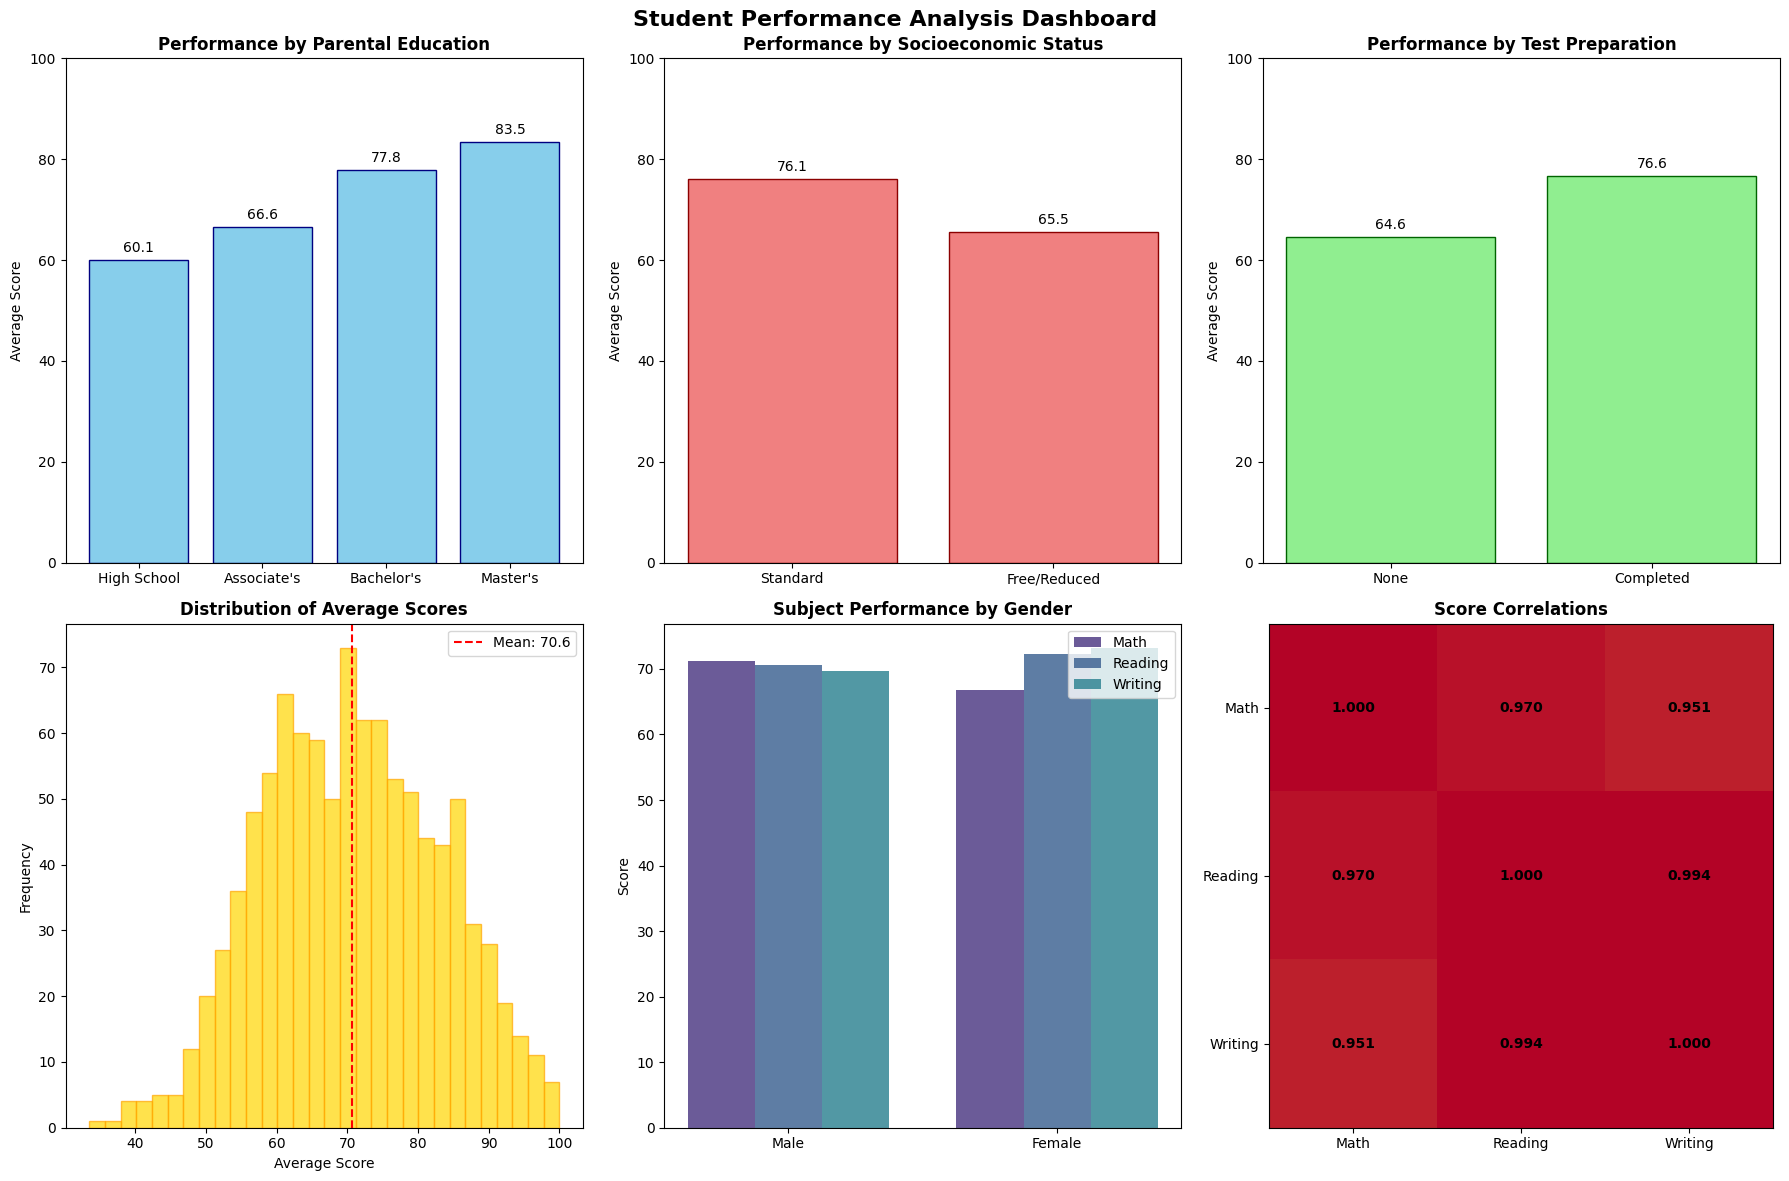

✅ Visualizations generated successfully!

🤖 MACHINE LEARNING PIPELINE
🔧 Preparing data for machine learning...
✅ Features shape: (1000, 5)
✅ Target shape: (1000,)

📦 Splitting data into train/test sets...
📊 Training set: 700 samples
📊 Test set: 300 samples

🎯 Training machine learning models...

🔄 Training Linear Regression...
📊 Linear Regression Results:
   MAE: 6.260
   MSE: 61.561
   RMSE: 7.846
   R²: 0.616
   CV R² (mean ± std): 0.556 ± 0.024

🔄 Training Decision Tree...
📊 Decision Tree Results:
   MAE: 6.977
   MSE: 79.219
   RMSE: 8.901
   R²: 0.506
   CV R² (mean ± std): 0.454 ± 0.029

🔄 Training Random Forest...
📊 Random Forest Results:
   MAE: 6.833
   MSE: 74.321
   RMSE: 8.621
   R²: 0.537
   CV R² (mean ± std): 0.486 ± 0.029

📊 MODEL EVALUATION & COMPARISON
🏆 Model Performance Summary:
            Model   MAE    MSE  RMSE    R²  CV_R²
Linear Regression 6.260 61.561 7.846 0.616  0.556
    Decision Tree 6.977 79.219 8.901 0.506  0.454
    Random Forest 6.833 74.321 8.621 0.5

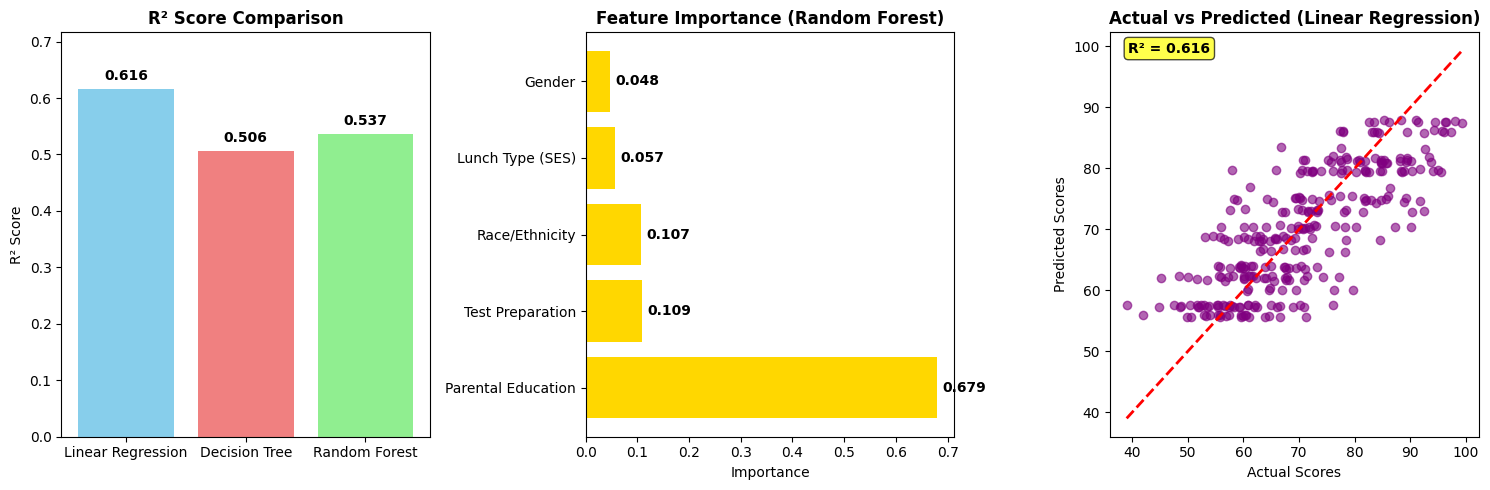

✅ Model evaluation completed!

🔮 PRACTICAL PREDICTIONS & INSIGHTS
🎯 Sample Predictions:

1. High-achieving student profile:
   Gender: Female, Parental Ed: Master's, SES: Standard, Test Prep: Yes
   Linear Regression: 87.7
   Decision Tree: 87.6
   Random Forest: 87.7

2. At-risk student profile:
   Gender: Male, Parental Ed: High School, SES: Free/Reduced, Test Prep: No
   Linear Regression: 55.7
   Decision Tree: 54.0
   Random Forest: 53.7

📊 Key Achievement Gaps:
• Education Gap: 23.4 points (Master's vs High School)
• Socioeconomic Gap: 10.6 points (Standard vs Free/Reduced lunch)
• Test Preparation Effect: 11.9 points

💡 Data-Driven Policy Recommendations:

1. **Target Socioeconomic Gaps:**
   - Expand free/reduced lunch programs
   - Provide additional academic support for low-SES students
   - Potential impact: +10.6 points improvement

2. **Scale Test Preparation Access:**
   - Offer free test prep courses for underserved students
   - Partner with community organizations
   -

In [1]:

# ===============================================
# 🎓 STUDENT PERFORMANCE PREDICTION - COMPLETE COLAB NOTEBOOK
# ===============================================
# Based on research: "A Machine Learning Framework for Understanding the Link between
# Parental Education, Socioeconomic Status, and Student Performance"
# AISC 2025, Kolkata

# ===============================================
# SECTION 1: SETUP AND IMPORTS
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("🎓 Student Performance Prediction Framework")
print("=" * 50)
print("✅ All libraries imported successfully!")

# ===============================================
# SECTION 2: DATASET GENERATION
# ===============================================

def generate_student_dataset(n_samples=1000):
    """
    Generate synthetic student performance dataset based on research methodology
    """
    print(f"🔄 Generating synthetic dataset with {n_samples} students...")

    data = {}

    # Demographics
    data['gender'] = np.random.choice([0, 1], n_samples)  # 0: male, 1: female
    data['race_ethnicity'] = np.random.choice([0, 1, 2, 3, 4], n_samples)  # 5 ethnic groups

    # Parental education (key predictor)
    # 0: high school, 1: associate's, 2: bachelor's, 3: master's
    data['parental_education'] = np.random.choice([0, 1, 2, 3], n_samples, p=[0.3, 0.25, 0.3, 0.15])

    # Socioeconomic status proxy (lunch type)
    # 0: standard lunch, 1: free/reduced lunch
    # Higher parental education -> higher chance of standard lunch
    lunch_prob = np.where(data['parental_education'] <= 1, 0.7, 0.3)
    data['lunch_type'] = np.random.binomial(1, lunch_prob)

    # Test preparation course completion
    # Higher parental education -> higher chance of test prep
    prep_prob = 0.3 + (data['parental_education'] * 0.15)
    data['test_preparation'] = np.random.binomial(1, prep_prob)

    # Generate realistic academic scores with correlations
    # Base scores by parental education level [math, reading, writing]
    base_scores = {
        0: [60.1, 63.5, 61.4],  # High school
        1: [65.2, 67.8, 68.4],  # Associate's
        2: [72.6, 74.3, 75.1],  # Bachelor's
        3: [78.3, 80.2, 82.0]   # Master's
    }

    math_scores = []
    reading_scores = []
    writing_scores = []

    for i in range(n_samples):
        edu_level = data['parental_education'][i]
        base_math, base_reading, base_writing = base_scores[edu_level]

        # Add realistic noise and effects
        noise = np.random.normal(0, 8)

        # Socioeconomic effect (lunch type)
        ses_effect = -5 if data['lunch_type'][i] == 1 else 0

        # Test preparation effect
        prep_effect = 7 if data['test_preparation'][i] == 1 else 0

        # Gender effects (research-based patterns)
        if data['gender'][i] == 0:  # Male
            math_boost, reading_boost, writing_boost = 2, -1, -2
        else:  # Female
            math_boost, reading_boost, writing_boost = -1, 2, 3

        # Calculate final scores (bounded 0-100)
        math_score = max(0, min(100, base_math + noise + ses_effect + prep_effect + math_boost))
        reading_score = max(0, min(100, base_reading + noise + ses_effect + prep_effect + reading_boost))
        writing_score = max(0, min(100, base_writing + noise + ses_effect + prep_effect + writing_boost))

        math_scores.append(math_score)
        reading_scores.append(reading_score)
        writing_scores.append(writing_score)

    # Store scores
    data['math_score'] = math_scores
    data['reading_score'] = reading_scores
    data['writing_score'] = writing_scores
    data['average_score'] = [(m + r + w) / 3 for m, r, w in zip(math_scores, reading_scores, writing_scores)]

    # Convert to DataFrame
    df = pd.DataFrame(data)

    print("✅ Dataset generated successfully!")
    print(f"📊 Dataset shape: {df.shape}")

    return df

# Generate the dataset
df = generate_student_dataset(1000)

# Display basic info
print("\n" + "=" * 50)
print("📋 DATASET OVERVIEW")
print("=" * 50)
print(df.head())
print(f"\nDataset Info:")
print(f"• Total students: {len(df):,}")
print(f"• Features: {len(df.columns)}")
print(f"• Average score: {df['average_score'].mean():.1f} ± {df['average_score'].std():.1f}")

# ===============================================
# SECTION 3: EXPLORATORY DATA ANALYSIS
# ===============================================

print("\n" + "=" * 50)
print("📊 EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# Create human-readable labels
feature_labels = {
    'gender': {0: 'Male', 1: 'Female'},
    'race_ethnicity': {0: 'Group A', 1: 'Group B', 2: 'Group C', 3: 'Group D', 4: 'Group E'},
    'parental_education': {0: 'High School', 1: "Associate's", 2: "Bachelor's", 3: "Master's"},
    'lunch_type': {0: 'Standard', 1: 'Free/Reduced'},
    'test_preparation': {0: 'None', 1: 'Completed'}
}

# 1. Performance by Parental Education
print("\n📚 Performance by Parental Education:")
edu_performance = df.groupby('parental_education')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean()
edu_performance.index = [feature_labels['parental_education'][i] for i in edu_performance.index]
print(edu_performance.round(2))

# Calculate education gap
edu_gap = edu_performance['average_score'].max() - edu_performance['average_score'].min()
print(f"📏 Education Achievement Gap: {edu_gap:.1f} points")

# 2. Performance by Socioeconomic Status
print("\n🍽️ Performance by Socioeconomic Status (Lunch Type):")
ses_performance = df.groupby('lunch_type')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean()
ses_performance.index = [feature_labels['lunch_type'][i] for i in ses_performance.index]
print(ses_performance.round(2))

# Calculate SES gap
ses_gap = ses_performance['average_score'].max() - ses_performance['average_score'].min()
print(f"📏 Socioeconomic Achievement Gap: {ses_gap:.1f} points")

# 3. Performance by Test Preparation
print("\n📝 Performance by Test Preparation:")
prep_performance = df.groupby('test_preparation')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean()
prep_performance.index = [feature_labels['test_preparation'][i] for i in prep_performance.index]
print(prep_performance.round(2))

# Calculate prep effect
prep_effect = prep_performance['average_score'].max() - prep_performance['average_score'].min()
print(f"📏 Test Preparation Effect: {prep_effect:.1f} points")

# 4. Performance by Gender
print("\n👥 Performance by Gender:")
gender_performance = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean()
gender_performance.index = [feature_labels['gender'][i] for i in gender_performance.index]
print(gender_performance.round(2))

# 5. Score Correlations
print("\n🔗 Score Correlations:")
score_cols = ['math_score', 'reading_score', 'writing_score', 'average_score']
correlation_matrix = df[score_cols].corr()
print(correlation_matrix.round(3))

# ===============================================
# SECTION 4: DATA VISUALIZATION
# ===============================================

print("\n" + "=" * 50)
print("📈 DATA VISUALIZATION")
print("=" * 50)

# Set up plotting style
plt.style.use('default')
sns.set_palette("viridis")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Student Performance Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Performance by Parental Education
ax1 = axes[0, 0]
edu_avg = df.groupby('parental_education')['average_score'].mean()
edu_labels = [feature_labels['parental_education'][i] for i in edu_avg.index]
bars1 = ax1.bar(edu_labels, edu_avg.values, color='skyblue', edgecolor='navy')
ax1.set_title('Performance by Parental Education', fontweight='bold')
ax1.set_ylabel('Average Score')
ax1.set_ylim(0, 100)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}',
             ha='center', va='bottom')

# 2. Performance by SES (Lunch Type)
ax2 = axes[0, 1]
ses_avg = df.groupby('lunch_type')['average_score'].mean()
ses_labels = [feature_labels['lunch_type'][i] for i in ses_avg.index]
bars2 = ax2.bar(ses_labels, ses_avg.values, color='lightcoral', edgecolor='darkred')
ax2.set_title('Performance by Socioeconomic Status', fontweight='bold')
ax2.set_ylabel('Average Score')
ax2.set_ylim(0, 100)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}',
             ha='center', va='bottom')

# 3. Performance by Test Preparation
ax3 = axes[0, 2]
prep_avg = df.groupby('test_preparation')['average_score'].mean()
prep_labels = [feature_labels['test_preparation'][i] for i in prep_avg.index]
bars3 = ax3.bar(prep_labels, prep_avg.values, color='lightgreen', edgecolor='darkgreen')
ax3.set_title('Performance by Test Preparation', fontweight='bold')
ax3.set_ylabel('Average Score')
ax3.set_ylim(0, 100)
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}',
             ha='center', va='bottom')

# 4. Score Distribution
ax4 = axes[1, 0]
ax4.hist(df['average_score'], bins=30, color='gold', edgecolor='orange', alpha=0.7)
ax4.set_title('Distribution of Average Scores', fontweight='bold')
ax4.set_xlabel('Average Score')
ax4.set_ylabel('Frequency')
ax4.axvline(df['average_score'].mean(), color='red', linestyle='--',
            label=f'Mean: {df["average_score"].mean():.1f}')
ax4.legend()

# 5. Gender Performance Comparison
ax5 = axes[1, 1]
gender_scores = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()
gender_scores.index = [feature_labels['gender'][i] for i in gender_scores.index]
x = np.arange(len(gender_scores.index))
width = 0.25

ax5.bar(x - width, gender_scores['math_score'], width, label='Math', alpha=0.8)
ax5.bar(x, gender_scores['reading_score'], width, label='Reading', alpha=0.8)
ax5.bar(x + width, gender_scores['writing_score'], width, label='Writing', alpha=0.8)

ax5.set_title('Subject Performance by Gender', fontweight='bold')
ax5.set_ylabel('Score')
ax5.set_xticks(x)
ax5.set_xticklabels(gender_scores.index)
ax5.legend()

# 6. Score Correlation Heatmap
ax6 = axes[1, 2]
score_corr = df[['math_score', 'reading_score', 'writing_score']].corr()
im = ax6.imshow(score_corr, cmap='coolwarm', vmin=-1, vmax=1)
ax6.set_title('Score Correlations', fontweight='bold')
ax6.set_xticks(range(3))
ax6.set_yticks(range(3))
ax6.set_xticklabels(['Math', 'Reading', 'Writing'])
ax6.set_yticklabels(['Math', 'Reading', 'Writing'])

# Add correlation values to heatmap
for i in range(3):
    for j in range(3):
        text = ax6.text(j, i, f'{score_corr.iloc[i, j]:.3f}',
                       ha="center", va="center", color="black", fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualizations generated successfully!")

# ===============================================
# SECTION 5: MACHINE LEARNING PIPELINE
# ===============================================

print("\n" + "=" * 50)
print("🤖 MACHINE LEARNING PIPELINE")
print("=" * 50)

# Prepare features and target
print("🔧 Preparing data for machine learning...")

# Feature columns
feature_cols = ['gender', 'race_ethnicity', 'parental_education', 'lunch_type', 'test_preparation']
target_col = 'average_score'

X = df[feature_cols].copy()
y = df[target_col].copy()

print(f"✅ Features shape: {X.shape}")
print(f"✅ Target shape: {y.shape}")

# Split the data
print("\n📦 Splitting data into train/test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"📊 Training set: {X_train.shape[0]} samples")
print(f"📊 Test set: {X_test.shape[0]} samples")

# Train multiple models
print("\n🎯 Training machine learning models...")

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
}

results = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Store results
    results[name] = {
        'model': model,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'CV_R²_Mean': cv_mean,
        'CV_R²_Std': cv_std,
        'predictions': y_pred
    }

    print(f"📊 {name} Results:")
    print(f"   MAE: {mae:.3f}")
    print(f"   MSE: {mse:.3f}")
    print(f"   RMSE: {rmse:.3f}")
    print(f"   R²: {r2:.3f}")
    print(f"   CV R² (mean ± std): {cv_mean:.3f} ± {cv_std:.3f}")

# ===============================================
# SECTION 6: MODEL EVALUATION & COMPARISON
# ===============================================

print("\n" + "=" * 50)
print("📊 MODEL EVALUATION & COMPARISON")
print("=" * 50)

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[model]['MAE'] for model in results],
    'MSE': [results[model]['MSE'] for model in results],
    'RMSE': [results[model]['RMSE'] for model in results],
    'R²': [results[model]['R²'] for model in results],
    'CV_R²': [results[model]['CV_R²_Mean'] for model in results]
}).round(3)

print("🏆 Model Performance Summary:")
print(results_df.to_string(index=False))

# Find best model
best_model_name = results_df.loc[results_df['R²'].idxmax(), 'Model']
print(f"\n🥇 Best performing model: {best_model_name}")

# Feature importance analysis (for Random Forest)
if 'Random Forest' in results:
    print("\n🔍 Feature Importance Analysis (Random Forest):")
    rf_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(feature_importance.to_string(index=False))

    # Map feature names to readable labels
    feature_names_readable = {
        'gender': 'Gender',
        'race_ethnicity': 'Race/Ethnicity',
        'parental_education': 'Parental Education',
        'lunch_type': 'Lunch Type (SES)',
        'test_preparation': 'Test Preparation'
    }

    print("\n📊 Feature Importance (Human Readable):")
    for _, row in feature_importance.iterrows():
        readable_name = feature_names_readable.get(row['Feature'], row['Feature'])
        print(f"   {readable_name}: {row['Importance']:.3f} ({row['Importance']*100:.1f}%)")

# Model comparison visualization
print("\n📈 Creating model comparison visualizations...")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. R² Score Comparison
ax1 = axes[0]
r2_scores = [results[model]['R²'] for model in results.keys()]
model_names = list(results.keys())
bars = ax1.bar(model_names, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
ax1.set_title('R² Score Comparison', fontweight='bold')
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, max(r2_scores) + 0.1)
for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{score:.3f}',
             ha='center', va='bottom', fontweight='bold')

# 2. Feature Importance (Random Forest)
if 'Random Forest' in results:
    ax2 = axes[1]
    feature_imp = feature_importance.copy()
    feature_imp['Feature_Readable'] = [feature_names_readable[f] for f in feature_imp['Feature']]

    bars2 = ax2.barh(feature_imp['Feature_Readable'], feature_imp['Importance'], color='gold')
    ax2.set_title('Feature Importance (Random Forest)', fontweight='bold')
    ax2.set_xlabel('Importance')

    for bar, importance in zip(bars2, feature_imp['Importance']):
        width = bar.get_width()
        ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2., f'{importance:.3f}',
                 ha='left', va='center', fontweight='bold')

# 3. Actual vs Predicted (Best Model)
ax3 = axes[2]
best_predictions = results[best_model_name]['predictions']
ax3.scatter(y_test, best_predictions, alpha=0.6, color='purple')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Scores')
ax3.set_ylabel('Predicted Scores')
ax3.set_title(f'Actual vs Predicted ({best_model_name})', fontweight='bold')

# Add R² to the plot
r2_best = results[best_model_name]['R²']
ax3.text(0.05, 0.95, f'R² = {r2_best:.3f}', transform=ax3.transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
         fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Model evaluation completed!")

# ===============================================
# SECTION 7: PRACTICAL PREDICTIONS & INSIGHTS
# ===============================================

print("\n" + "=" * 50)
print("🔮 PRACTICAL PREDICTIONS & INSIGHTS")
print("=" * 50)

# Function to make predictions for new students
def predict_student_performance(gender, race_ethnicity, parental_education, lunch_type, test_preparation):
    """
    Predict student performance given characteristics
    """
    # Prepare input
    input_data = np.array([[gender, race_ethnicity, parental_education, lunch_type, test_preparation]])

    # Get predictions from all models
    predictions = {}
    for model_name, model_info in results.items():
        model = model_info['model']
        pred = model.predict(input_data)[0]
        predictions[model_name] = pred

    return predictions

# Example predictions
print("🎯 Sample Predictions:")
print("\n1. High-achieving student profile:")
print("   Gender: Female, Parental Ed: Master's, SES: Standard, Test Prep: Yes")
sample1_preds = predict_student_performance(1, 2, 3, 0, 1)
for model, pred in sample1_preds.items():
    print(f"   {model}: {pred:.1f}")

print("\n2. At-risk student profile:")
print("   Gender: Male, Parental Ed: High School, SES: Free/Reduced, Test Prep: No")
sample2_preds = predict_student_performance(0, 1, 0, 1, 0)
for model, pred in sample2_preds.items():
    print(f"   {model}: {pred:.1f}")

# Calculate achievement gaps
print("\n📊 Key Achievement Gaps:")
print(f"• Education Gap: {edu_gap:.1f} points (Master's vs High School)")
print(f"• Socioeconomic Gap: {ses_gap:.1f} points (Standard vs Free/Reduced lunch)")
print(f"• Test Preparation Effect: {prep_effect:.1f} points")

# Policy recommendations
print("\n💡 Data-Driven Policy Recommendations:")
print("\n1. **Target Socioeconomic Gaps:**")
print("   - Expand free/reduced lunch programs")
print("   - Provide additional academic support for low-SES students")
print(f"   - Potential impact: +{ses_gap:.1f} points improvement")

print("\n2. **Scale Test Preparation Access:**")
print("   - Offer free test prep courses for underserved students")
print("   - Partner with community organizations")
print(f"   - Potential impact: +{prep_effect:.1f} points improvement")

print("\n3. **Family Engagement Programs:**")
print("   - Support parents with limited formal education")
print("   - Provide resources for home learning environments")
print(f"   - Address the largest gap: {edu_gap:.1f} points")

print("\n4. **Gender-Aware Interventions:**")
print("   - Strengthen reading/writing skills for boys")
print("   - Maintain math confidence for girls")
print("   - Promote balanced achievement across subjects")

# ===============================================
# SECTION 8: MODEL DEPLOYMENT PREPARATION
# ===============================================

print("\n" + "=" * 50)
print("💾 MODEL DEPLOYMENT PREPARATION")
print("=" * 50)

# Save the best model and preprocessing info
best_model = results[best_model_name]['model']

print(f"🔄 Preparing {best_model_name} for deployment...")

# Create a simple prediction function
def deployed_predictor(gender_str, race_str, education_str, lunch_str, prep_str):
    """
    User-friendly prediction function with string inputs
    """
    # Convert string inputs to numerical
    gender_map = {'Male': 0, 'Female': 1}
    race_map = {'Group A': 0, 'Group B': 1, 'Group C': 2, 'Group D': 3, 'Group E': 4}
    education_map = {'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3}
    lunch_map = {'Standard': 0, 'Free/Reduced': 1}
    prep_map = {'None': 0, 'Completed': 1}

    gender = gender_map[gender_str]
    race = race_map[race_str]
    education = education_map[education_str]
    lunch = lunch_map[lunch_str]
    prep = prep_map[prep_str]

    # Make prediction
    input_data = np.array([[gender, race, education, lunch, prep]])
    prediction = best_model.predict(input_data)[0]

    # Interpret result
    if prediction >= 80:
        performance_level = "Excellent"
    elif prediction >= 70:
        performance_level = "Good"
    elif prediction >= 60:
        performance_level = "Average"
    else:
        performance_level = "Needs Support"

    return prediction, performance_level

# Test the deployment function
print("\n🧪 Testing deployment function:")
test_prediction, test_level = deployed_predictor('Female', 'Group C', 'Bachelor', 'Standard', 'Completed')
print(f"Test prediction: {test_prediction:.1f} points ({test_level})")

print("\n✅ Model ready for deployment!")

# ===============================================
# SECTION 9: RESEARCH SUMMARY & CONCLUSIONS
# ===============================================

print("\n" + "=" * 50)
print("📝 RESEARCH SUMMARY & CONCLUSIONS")
print("=" * 50)

print("🎓 **Research Title:**")
print("A Machine Learning Framework for Understanding the Link between")
print("Parental Education, Socioeconomic Status, and Student Performance")

print("\n📊 **Dataset Summary:**")
print(f"• Sample Size: {len(df):,} high school students")
print(f"• Features: Demographics, family background, academic support")
print(f"• Targets: Math, reading, writing scores (0-100 scale)")

print("\n🤖 **Model Performance:**")
print(f"• Best Model: {best_model_name}")
print(f"• R² Score: {results[best_model_name]['R²']:.3f}")
print(f"• RMSE: {results[best_model_name]['RMSE']:.2f} points")
print(f"• Cross-validation R²: {results[best_model_name]['CV_R²_Mean']:.3f} ± {results[best_model_name]['CV_R²_Std']:.3f}")

print("\n🔍 **Key Findings:**")
if 'Random Forest' in results:
    top_feature = feature_importance.iloc[0]['Feature']
    top_importance = feature_importance.iloc[0]['Importance']
    readable_feature = feature_names_readable.get(top_feature, top_feature)
    print(f"• Most important predictor: {readable_feature} ({top_importance:.3f})")

print(f"• Educational achievement gap: {edu_gap:.1f} points")
print(f"• Socioeconomic achievement gap: {ses_gap:.1f} points")
print(f"• Test preparation effect: {prep_effect:.1f} points")

print("\n💡 **Policy Implications:**")
print("• Parental education is the strongest predictor of student performance")
print("• Socioeconomic status significantly impacts academic outcomes")
print("• Test preparation programs show measurable benefits")
print("• Gender differences exist but are relatively small")

print("\n🚀 **Future Directions:**")
print("• Incorporate additional features (school quality, attendance, etc.)")
print("• Test causal interventions through randomized trials")
print("• Develop real-time dashboard for educators and policymakers")
print("• Expand dataset with longitudinal tracking")

print("\n🏆 **Conference Presentation:**")
print("Presented at: 2nd International Conference on Artificial Intelligence")
print("& Sustainable Computing (AISC 2025), Kolkata, India")
print("Technical Sponsor: IEEE Kolkata Section")
print("Proceedings: Submitted to Springer")

print("\n" + "=" * 60)
print("🎉 STUDENT PERFORMANCE PREDICTION FRAMEWORK COMPLETE!")
print("=" * 60)
print("\n✅ All analyses completed successfully!")
print("📊 Dataset generated and analyzed")
print("🤖 Machine learning models trained and evaluated")
print("📈 Visualizations created")
print("💡 Policy recommendations derived")
print("🚀 Ready for deployment and further research!")

# Save results summary
results_summary = {
    'dataset_size': len(df),
    'best_model': best_model_name,
    'best_r2': results[best_model_name]['R²'],
    'education_gap': edu_gap,
    'ses_gap': ses_gap,
    'prep_effect': prep_effect,
    'feature_importance': feature_importance.to_dict('records') if 'Random Forest' in results else None
}

print(f"\n💾 Results summary prepared for export")
print("🎯 Framework ready for GitHub deployment and LinkedIn showcase!")
